In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
import scipy.stats as stats
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim1.csv")
df.head()

,Unnamed: 0,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [5]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [6]:
df['newbalanceDest'].value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
16532032.16         25
                ...   
350033.41            1
302234.71            1
219824.01            1
808511.54            1
970408.13            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [9]:
df = df.sample(n=10000)

In [20]:
smt = SMOTE(k_neighbors=1)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
Y_train_sm.value_counts()

isFraud
0          7993
1          7993
dtype: int64

In [21]:
smt = SMOTE(k_neighbors=1)
X_test_sm, Y_test_sm = smt.fit_resample(X_test, Y_test)
Y_test_sm.value_counts()

isFraud
0          1998
1          1998
dtype: int64

In [25]:
model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 1.0
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Confusion Matrix
[[1998    0]
 [   0    2]]


In [26]:


print(metrics.classification_report(Y_test, predicted))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



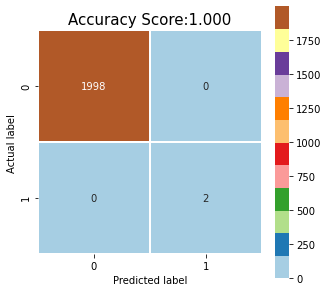

In [27]:

cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Paired');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);



1.0


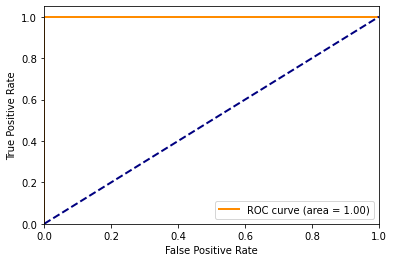

In [28]:
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [29]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00         2

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [30]:
warnings.filterwarnings("ignore")
cross_val = cross_val_score(LogisticRegression(), X_test,Y_test, scoring = 'accuracy', cv=10)
print(cross_val)

[1.    1.    1.    1.    1.    1.    1.    1.    0.995 1.   ]
